In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head(6)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.size

1200

In [10]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary'>

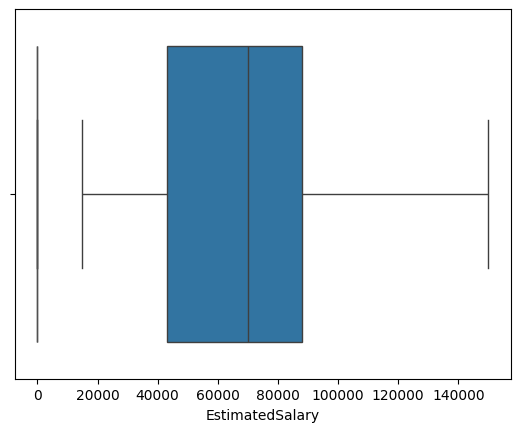

In [24]:
sns.boxplot(x=df["EstimatedSalary"])
sns.boxplot(x=df["Purchased"])

In [17]:
corr_mat=df.corr()

In [18]:
corr_mat

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: >

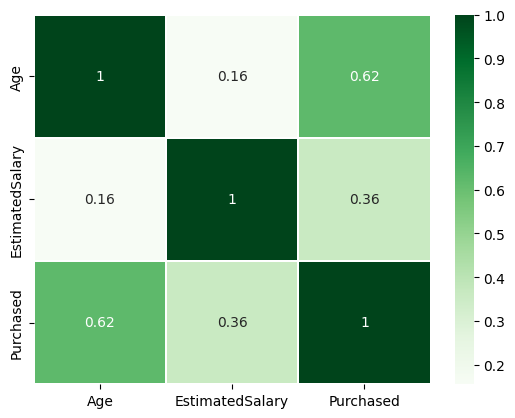

In [28]:
sns.heatmap(corr_mat, annot=True, cmap='Greens', linewidth=0.2)

In [29]:
from sklearn.model_selection import train_test_split 

In [36]:
x=df.iloc[:,:-1]
y=df.iloc[:, -1]

In [37]:
x, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [91]:
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.25, random_state=0)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
kn =KNeighborsClassifier(n_neighbors=11)

In [108]:
kn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [109]:
kn.score(X_test, Y_test)

0.89

In [112]:
from sklearn import metrics

In [113]:
y_pred=kn.predict(X_test)

In [115]:
accuracy=metrics.accuracy_score(y_pred, Y_test)
recall= metrics.recall_score(y_pred, Y_test)
auc=metrics.roc_auc_score(y_pred, Y_test)

auc

0.8896499238964992

In [116]:
accuracy

0.89

In [117]:

recall

0.8888888888888888